## Lung Cancer Detection using Machine Learning
### Using Survey Data

Loading the Necessary Modules

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [2]:
df=pd.read_csv('data.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

#### For Simplicity Sake, we make all the feature names in lowercase and also replace the space with underscores.

In [4]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ', '_')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   gender                 309 non-null    object
 1   age                    309 non-null    int64 
 2   smoking                309 non-null    int64 
 3   yellow_fingers         309 non-null    int64 
 4   anxiety                309 non-null    int64 
 5   peer_pressure          309 non-null    int64 
 6   chronic_disease        309 non-null    int64 
 7   fatigue                309 non-null    int64 
 8   allergy                309 non-null    int64 
 9   wheezing               309 non-null    int64 
 10  alcohol_consuming      309 non-null    int64 
 11  coughing               309 non-null    int64 
 12  shortness_of_breath    309 non-null    int64 
 13  swallowing_difficulty  309 non-null    int64 
 14  chest_pain             309 non-null    int64 
 15  lung_cancer            

In [6]:
df["lung_cancer"].unique()

array(['YES', 'NO'], dtype=object)

In [7]:
df["gender"].unique()

array(['M', 'F'], dtype=object)

#### Mapping Categorical Values to Numerical Values

In [8]:
df['gender'] = df['gender'].map({'F': 0, 'M': 1})

df['lung_cancer'] = df['lung_cancer'].map({'NO': 0, 'YES': 1})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   gender                 309 non-null    int64
 1   age                    309 non-null    int64
 2   smoking                309 non-null    int64
 3   yellow_fingers         309 non-null    int64
 4   anxiety                309 non-null    int64
 5   peer_pressure          309 non-null    int64
 6   chronic_disease        309 non-null    int64
 7   fatigue                309 non-null    int64
 8   allergy                309 non-null    int64
 9   wheezing               309 non-null    int64
 10  alcohol_consuming      309 non-null    int64
 11  coughing               309 non-null    int64
 12  shortness_of_breath    309 non-null    int64
 13  swallowing_difficulty  309 non-null    int64
 14  chest_pain             309 non-null    int64
 15  lung_cancer            309 non-null    i

In [10]:
print ('Healthy : {} '.format(df.lung_cancer.value_counts()[0]))
print ('On Risk : {} '.format(df.lung_cancer.value_counts()[1]))

Healthy : 39 
On Risk : 270 


#### Generating a HeatMap for the features

<Axes: >

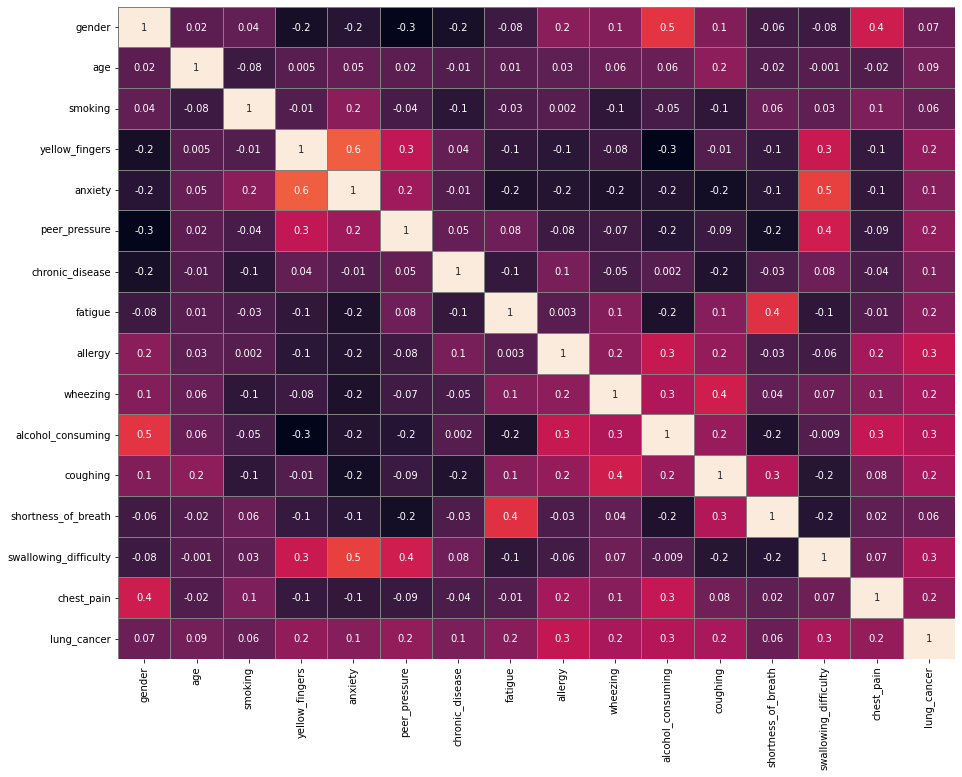

In [11]:
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cbar=False, linewidths=0.5, linecolor='grey')

([<matplotlib.patches.Wedge at 0x2acbdf0d940>,
 [Text(-1.0146551535005641, 0.42482339798408836, '1'),
  Text(1.0146551336131444, -0.42482344548352374, '0')],
 [Text(-0.5534482655457621, 0.23172185344586632, '87.4%'),
  Text(0.5534482546980787, -0.23172187935464927, '12.6%')])

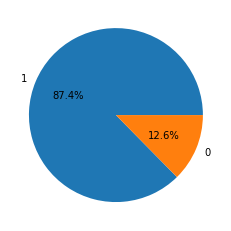

In [12]:
values = df['lung_cancer'].value_counts().tolist()
names = list(dict(df['lung_cancer'].value_counts()).keys())
plt.pie(values, labels = names,autopct='%1.1f%%')


#### Separating the Features and the Target Variables into X and y

In [13]:
X = df.drop("lung_cancer", axis=1)
X.head()

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1


In [14]:
y = df["lung_cancer"]
y.head()

0    1
1    1
2    0
3    0
4    0
Name: lung_cancer, dtype: int64

##### Sampling to Balance the Unbalanced Data

In [15]:
over_samp =  RandomOverSampler(random_state=0)
X_train_res, y_train_res = over_samp.fit_resample(X, y)
X_train_res.shape, y_train_res.shape

((540, 15), (540,))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size = 0.2, random_state = 42)

In [17]:
len(X_train), len(X_test)

(432, 108)

##### Data Scaling

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Linear Regression

In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [20]:
LinearRegressionScore = lr.score(X_test,y_test)
print("Model Accuracy :",LinearRegressionScore*100)

Model Accuracy : 64.04214644616874


### Logistic Regression

In [42]:
logmod = LogisticRegression()
logmod.fit(X_train,y_train)

LogisticRegression()

In [43]:
LogisticScore=logmod.score(X_test,y_test)
print("Accuracy :",LogisticScore*100)

Accuracy : 91.66666666666666


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

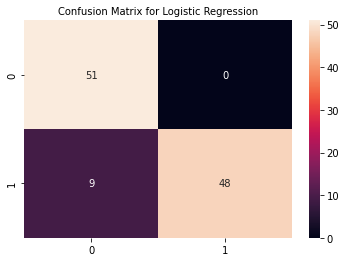

In [44]:
y_pred = logmod.predict(X_test)
cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True)
plt.title("Confusion Matrix for Logistic Regression", fontsize=10)

### Random Forest Classifier

In [23]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [24]:
RandomForestClassifierScore = rfc.score(X_test, y_test)
print("Accuracy :",RandomForestClassifierScore*100)

Accuracy : 99.07407407407408


##### Confusion Matrix for Random Forest Classifier

Text(0.5, 1.0, 'Confusion Matrix for RFClassifier')

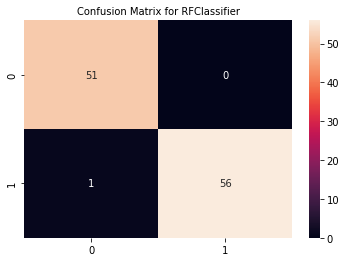

In [25]:
y_pred = rfc.predict(X_test)
cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True)
plt.title("Confusion Matrix for RFClassifier", fontsize=10)

In [26]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       1.00      0.98      0.99        57

    accuracy                           0.99       108
   macro avg       0.99      0.99      0.99       108
weighted avg       0.99      0.99      0.99       108



### K-Neighbors Classifier

In [27]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [28]:
KNeighborsClassifierScore = knn.score(X_test, y_test)
print("Accuracy :",KNeighborsClassifierScore*100)

Accuracy : 93.51851851851852


##### Confustion Matrix for KNN

Text(0.5, 1.0, 'Confusion Matrix for KNN')

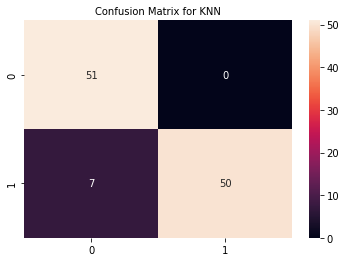

In [29]:
y_pred = knn.predict(X_test)
cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True)
plt.title("Confusion Matrix for KNN", fontsize=10)

In [30]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        51
           1       1.00      0.88      0.93        57

    accuracy                           0.94       108
   macro avg       0.94      0.94      0.94       108
weighted avg       0.94      0.94      0.94       108



### Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
DecisionTreeClassifierScore = dtc.score(X_test,y_test)
print("Accuracy :",DecisionTreeClassifierScore*100)

Accuracy : 96.29629629629629


##### Confustion Matrix for Decision Tree

Text(0.5, 1.0, 'Confusion Metrix for Decision Tree ')

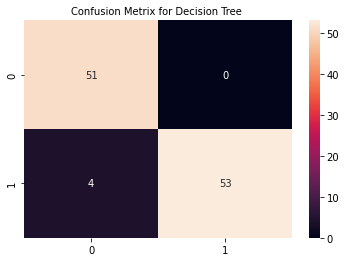

In [34]:
y_pred = dtc.predict(X_test)
cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True)
plt.title("Confusion Metrix for Decision Tree ", fontsize=10)

In [35]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        51
           1       1.00      0.93      0.96        57

    accuracy                           0.96       108
   macro avg       0.96      0.96      0.96       108
weighted avg       0.97      0.96      0.96       108



### Gradient Boosting Classifier

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [48]:
GradientBoostingClassifierScore = gb.score(X_test,y_test)
print("Accuracy :",GradientBoostingClassifierScore*100)

Accuracy : 96.29629629629629


##### Confusion Matrix for Gradient Boosting Classifier

Text(0.5, 1.0, 'Confusion Matrix for Gradient Boosting Classifier')

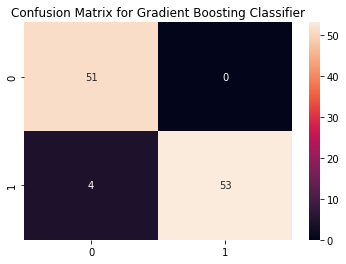

In [49]:
y_pred = gb.predict(X_test)
cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True)
plt.title("Confusion Matrix for Gradient Boosting Classifier", fontsize=12)

In [50]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        51
           1       1.00      0.93      0.96        57

    accuracy                           0.96       108
   macro avg       0.96      0.96      0.96       108
weighted avg       0.97      0.96      0.96       108



### CATBoost Classifier

In [87]:
cat = CatBoostClassifier(iterations = 50, learning_rate = 0.1)
cat.fit(X_train, y_train)

0:	learn: 0.6521745	total: 2.1ms	remaining: 103ms
1:	learn: 0.6238803	total: 21.2ms	remaining: 508ms
2:	learn: 0.5906212	total: 23.1ms	remaining: 362ms
3:	learn: 0.5661940	total: 24.9ms	remaining: 286ms
4:	learn: 0.5445287	total: 26.6ms	remaining: 239ms
5:	learn: 0.5225423	total: 28.2ms	remaining: 207ms
6:	learn: 0.5023472	total: 30ms	remaining: 184ms
7:	learn: 0.4838244	total: 31.6ms	remaining: 166ms
8:	learn: 0.4677573	total: 33.4ms	remaining: 152ms
9:	learn: 0.4526535	total: 35.1ms	remaining: 140ms
10:	learn: 0.4368568	total: 36.8ms	remaining: 131ms
11:	learn: 0.4233901	total: 38.5ms	remaining: 122ms
12:	learn: 0.4065851	total: 40.5ms	remaining: 115ms
13:	learn: 0.3938760	total: 42.2ms	remaining: 108ms
14:	learn: 0.3831292	total: 43.9ms	remaining: 102ms
15:	learn: 0.3735397	total: 44.8ms	remaining: 95.3ms
16:	learn: 0.3652663	total: 46.4ms	remaining: 90.1ms
17:	learn: 0.3509627	total: 47.8ms	remaining: 85ms
18:	learn: 0.3427626	total: 49.4ms	remaining: 80.6ms
19:	learn: 0.3325729	to

In [88]:
CATBoostClassifierScore = cat.score(X_test,y_test)
print("Accuracy :",CATBoostClassifierScore*100)

Accuracy : 96.29629629629629


Text(0.5, 1.0, 'Confusion Matrix for CATBoost Classifier')

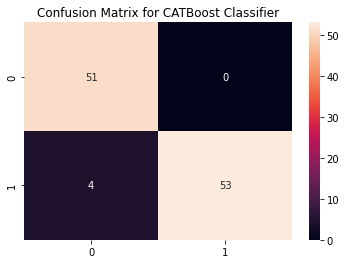

In [89]:
y_pred = cat.predict(X_test)
cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True)
plt.title("Confusion Matrix for CATBoost Classifier", fontsize=12)

In [90]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        51
           1       1.00      0.93      0.96        57

    accuracy                           0.96       108
   macro avg       0.96      0.96      0.96       108
weighted avg       0.97      0.96      0.96       108



### XGBoost Classifier

In [91]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [94]:
XGBClassifierScore = xgb.score(X_test,y_test)
print("Accuracy :",XGBClassifierScore*100)

Accuracy : 100.0


##### Confusion Matrix for XGB Classifier

Text(0.5, 1.0, 'Confusion Matrix for XGB Classifier')

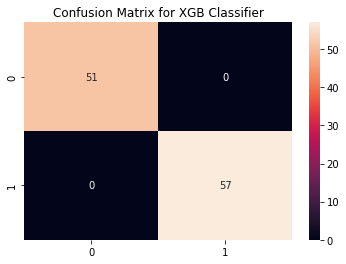

In [95]:
y_pred = xgb.predict(X_test)
cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True)
plt.title("Confusion Matrix for XGB Classifier", fontsize=12)

In [97]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        57

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108



### Model Comparison

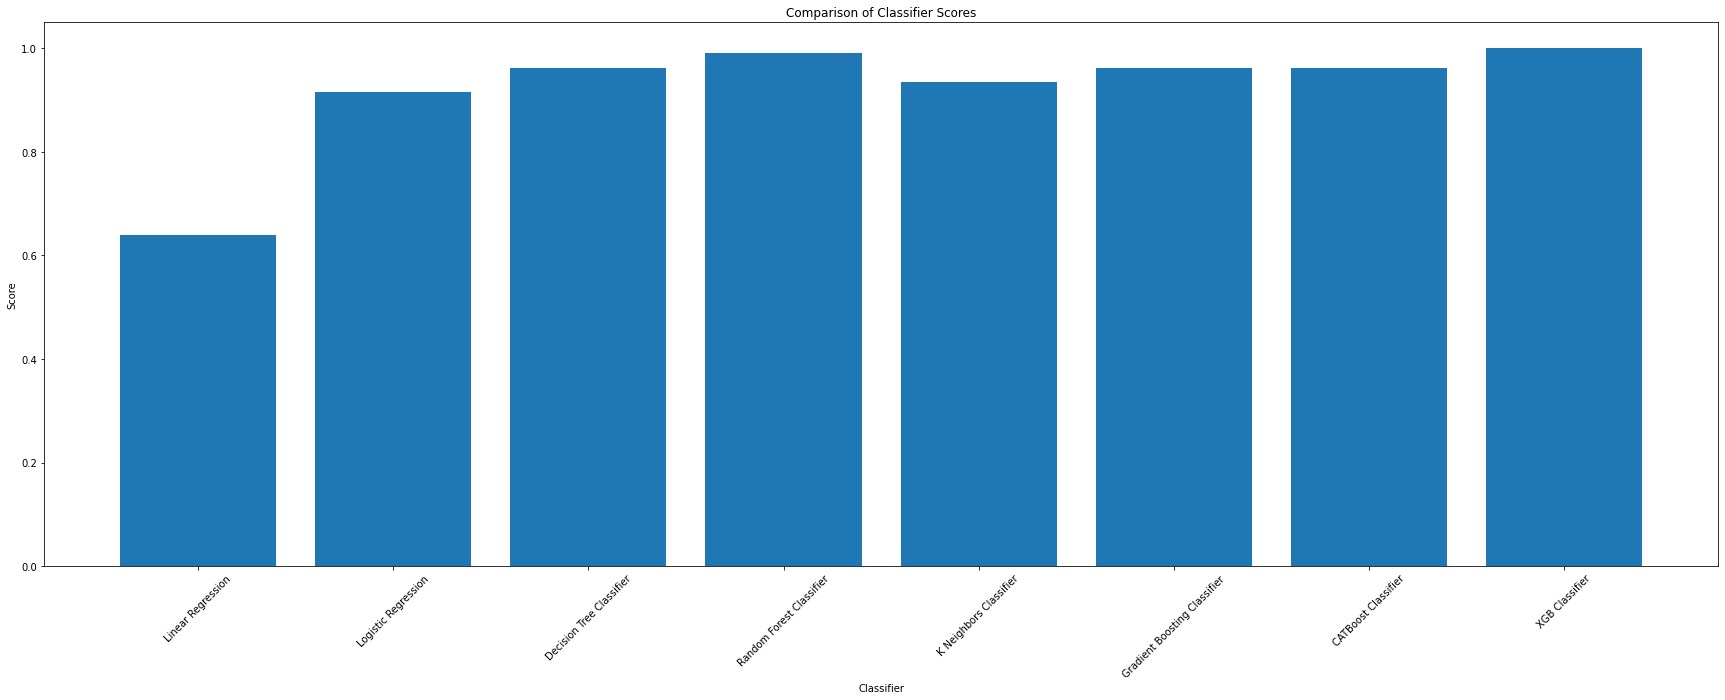

In [113]:
x = ["Linear Regression", 
     "Logistic Regression",
     "Decision Tree Classifier", 
     "Random Forest Classifier", 
     "K Neighbors Classifier",  
     "Gradient Boosting Classifier",
     "CATBoost Classifier",
     "XGB Classifier"]

y = [LinearRegressionScore,
     LogisticScore,
     DecisionTreeClassifierScore, 
     RandomForestClassifierScore, 
     KNeighborsClassifierScore,  
     GradientBoostingClassifierScore, 
     CATBoostClassifierScore,
     XGBClassifierScore]

plt.figure(figsize=(30, 10))
plt.bar(x, y)
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.title('Comparison of Classifier Scores')
plt.xticks(rotation=45)
plt.show()

##### Among the Trained Models, XGBBoost gives the highest accuracy while the other models such as RandomForestClassifier gives good percentage of accuracy as well when tested against test sets.